### This notebook contains data preprocessing code to convert the DETRAC train annotations to fit the format required by the JDE model
### https://github.com/Zhongdao/Towards-Realtime-MOT

### DETRAC dataset : http://detrac-db.rit.albany.edu/

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import time
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [8]:
detrac_anno_folder = './DETRAC-Train-Annotations-XML-v3'
img_size = [960, 540]

In [3]:
anno_xmls = []
folder_name = []
xml_list = os.listdir(detrac_anno_folder)
for anno_xml in xml_list:
    anno_xmls.append(os.path.join(detrac_anno_folder, anno_xml))
    folder_name.append(anno_xml[:-7])
anno_xmls

['./DETRAC-Train-Annotations-XML-v3\\MVI_20011_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20012_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20032_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20033_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20034_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20035_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20051_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20052_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20061_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20062_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20063_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20064_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_20065_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_39761_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_39771_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_39781_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_39801_v3.xml',
 './DETRAC-Train-Annotations-XML-v3\\MVI_39811_v

In [4]:
folder_name

['MVI_20011',
 'MVI_20012',
 'MVI_20032',
 'MVI_20033',
 'MVI_20034',
 'MVI_20035',
 'MVI_20051',
 'MVI_20052',
 'MVI_20061',
 'MVI_20062',
 'MVI_20063',
 'MVI_20064',
 'MVI_20065',
 'MVI_39761',
 'MVI_39771',
 'MVI_39781',
 'MVI_39801',
 'MVI_39811',
 'MVI_39821',
 'MVI_39851',
 'MVI_39861',
 'MVI_39931',
 'MVI_40131',
 'MVI_40141',
 'MVI_40152',
 'MVI_40161',
 'MVI_40162',
 'MVI_40171',
 'MVI_40172',
 'MVI_40181',
 'MVI_40191',
 'MVI_40192',
 'MVI_40201',
 'MVI_40204',
 'MVI_40211',
 'MVI_40212',
 'MVI_40213',
 'MVI_40241',
 'MVI_40243',
 'MVI_40244',
 'MVI_40732',
 'MVI_40751',
 'MVI_40752',
 'MVI_40871',
 'MVI_40962',
 'MVI_40963',
 'MVI_40981',
 'MVI_40991',
 'MVI_40992',
 'MVI_41063',
 'MVI_41073',
 'MVI_63521',
 'MVI_63525',
 'MVI_63544',
 'MVI_63552',
 'MVI_63553',
 'MVI_63554',
 'MVI_63561',
 'MVI_63562',
 'MVI_63563']

In [6]:
def convertBox(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + (box[2] / 2.0))
    y = (box[1] + (box[3] / 2.0))
    w = box[2]
    h = box[3]
    x = x*dw
    y = y*dh
    w = w*dw
    h = h*dh
    return (x,y,w,h)

def createDir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

def createDFRow(identity, bbox):
    return {'class': '0',
            'identity': str(identity),
            'x_center': str(format(bbox[0],'f')),
            'y_center': str(format(bbox[1],'f')),
            'width': str(format(bbox[2],'f')),
            'height': str(format(bbox[3],'f'))}

In [6]:
%%time
out_cols = ['class', 'identity', 'x_center', 'y_center', 'width', 'height']

for idx in range(len(anno_xmls)):
    print(f'Processing: {anno_xmls[idx]}')
    root = ET.parse(anno_xmls[idx]).getroot()
    folder = folder_name[idx]
    createDir(folder)
    for frame in root:
        if (frame.tag != 'frame'):
            continue
        file_name = 'img' + frame.attrib['num'].zfill(5) + '.txt'
        out_frame = pd.DataFrame(columns=out_cols)
        for targets in frame[0]:
            id = targets.attrib['id']
            box = [float(targets[0].attrib['left']),
                   float(targets[0].attrib['top']),
                   float(targets[0].attrib['width']),
                   float(targets[0].attrib['height'])]
            bbox = convertBox(img_size, box)
            out_row = createDFRow(id, bbox)
            out_frame = out_frame.append(out_row, ignore_index=True)
        np.savetxt(os.path.join(folder, file_name), out_frame, fmt='%s')

Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20011_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20012_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20032_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20033_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20034_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20035_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20051_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20052_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20061_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20062_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20063_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20064_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_20065_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_39761_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_39771_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3\MVI_39781

In [5]:
detrac_test_anno_folder = './DETRAC-Test-Annotations-XML'
test_img_size = [960, 540]
test_anno_xmls = []
test_folder_name = []
test_xml_list = os.listdir(detrac_test_anno_folder)
for anno_xml in test_xml_list:
    test_anno_xmls.append(os.path.join(detrac_test_anno_folder, anno_xml))
    test_folder_name.append(anno_xml[:-4])
test_folder_name

['MVI_39031',
 'MVI_39051',
 'MVI_39211',
 'MVI_39271',
 'MVI_39311',
 'MVI_39361',
 'MVI_39371',
 'MVI_39401',
 'MVI_39501',
 'MVI_39511',
 'MVI_40701',
 'MVI_40711',
 'MVI_40712',
 'MVI_40714',
 'MVI_40742',
 'MVI_40743',
 'MVI_40761',
 'MVI_40762',
 'MVI_40763',
 'MVI_40771',
 'MVI_40772',
 'MVI_40773',
 'MVI_40774',
 'MVI_40775',
 'MVI_40792',
 'MVI_40793',
 'MVI_40851',
 'MVI_40852',
 'MVI_40853',
 'MVI_40854',
 'MVI_40855',
 'MVI_40863',
 'MVI_40864',
 'MVI_40891',
 'MVI_40892',
 'MVI_40901',
 'MVI_40902',
 'MVI_40903',
 'MVI_40904',
 'MVI_40905']

In [8]:
%%time
out_cols = ['class', 'identity', 'x_center', 'y_center', 'width', 'height']

for idx in range(len(test_anno_xmls)):
    print(f'Processing: {test_anno_xmls[idx]}')
    root = ET.parse(test_anno_xmls[idx]).getroot()
    folder = test_folder_name[idx]
    createDir(folder)
    for frame in root:
        if (frame.tag != 'frame'):
            continue
        file_name = 'img' + frame.attrib['num'].zfill(5) + '.txt'
        out_frame = pd.DataFrame(columns=out_cols)
        for targets in frame[0]:
            id = targets.attrib['id']
            box = [float(targets[0].attrib['left']),
                   float(targets[0].attrib['top']),
                   float(targets[0].attrib['width']),
                   float(targets[0].attrib['height'])]
            bbox = convertBox(test_img_size, box)
            out_row = createDFRow(id, bbox)
            out_frame = out_frame.append(out_row, ignore_index=True)
        np.savetxt(os.path.join(folder, file_name), out_frame, fmt='%s')

Processing: ./DETRAC-Test-Annotations-XML\MVI_39031.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39051.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39211.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39271.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39311.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39361.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39371.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39401.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39501.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_39511.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40701.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40711.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40712.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40714.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40742.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40743.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40761.xml
Processing: ./DETRAC-Test-Annotations-XML\MVI_40

### Some test code below

In [7]:
img = cv2.imread('img00001.jpg')
img.shape

(540, 960, 3)

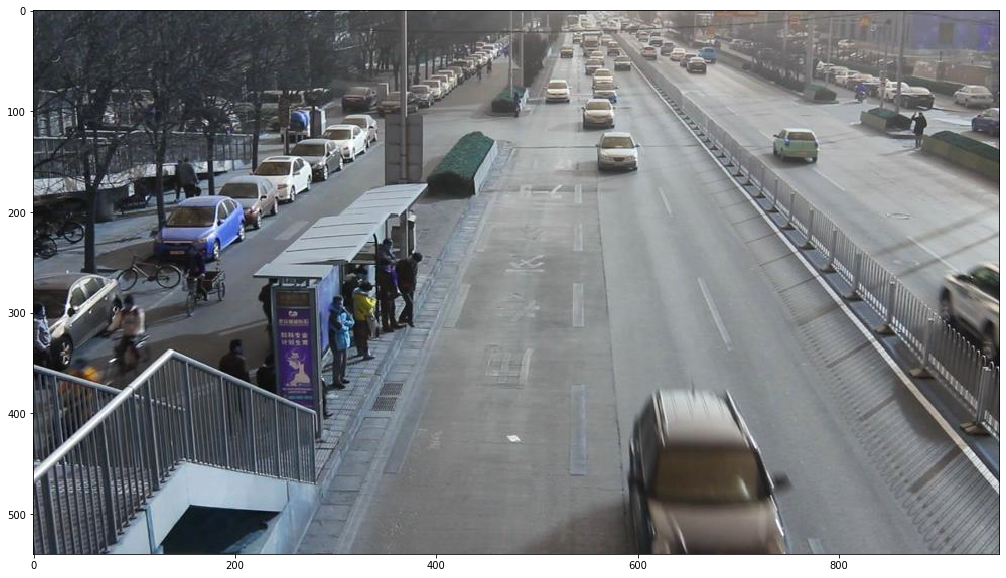

In [8]:
fig = plt.figure(figsize=(20,10))
plt.imshow(img)

In [16]:
left = 558
top = 121
width = 47
height = 43

X1 = left
Y1 = top
X2 = left + int(width/2)
Y2 = top + int(height/2)

cv2.rectangle(img,
            (X1, Y1),
            (X2, Y2),
            (255,0,0),
            2)

array([[[ 62,  64,  75],
        [ 70,  72,  83],
        [ 69,  71,  82],
        ...,
        [111, 115, 133],
        [110, 114, 132],
        [110, 114, 132]],

       [[ 64,  66,  77],
        [ 69,  71,  82],
        [ 66,  68,  79],
        ...,
        [111, 115, 133],
        [110, 114, 132],
        [110, 114, 132]],

       [[ 63,  65,  76],
        [ 64,  66,  77],
        [ 60,  62,  73],
        ...,
        [112, 116, 134],
        [111, 115, 133],
        [111, 115, 133]],

       ...,

       [[ 43,  48,  57],
        [ 43,  48,  57],
        [ 80,  85,  94],
        ...,
        [108, 113, 116],
        [111, 116, 119],
        [132, 137, 140]],

       [[ 48,  54,  61],
        [ 43,  49,  56],
        [ 76,  82,  89],
        ...,
        [117, 120, 124],
        [125, 128, 132],
        [141, 144, 148]],

       [[ 47,  53,  60],
        [ 40,  46,  53],
        [ 72,  78,  85],
        ...,
        [139, 142, 146],
        [140, 143, 147],
        [136, 139, 143]]

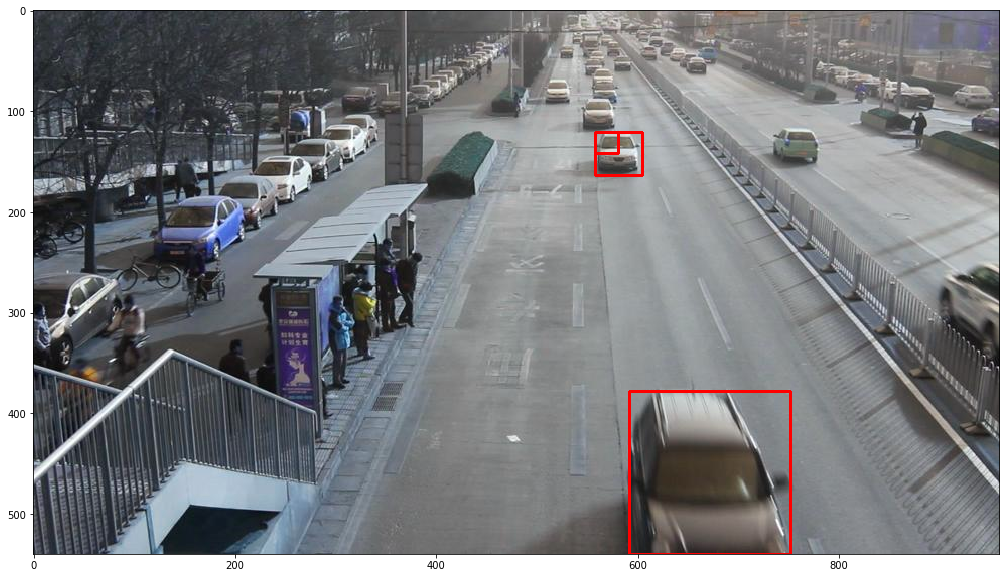

In [17]:
fig = plt.figure(figsize=(20,10))
plt.imshow(img)